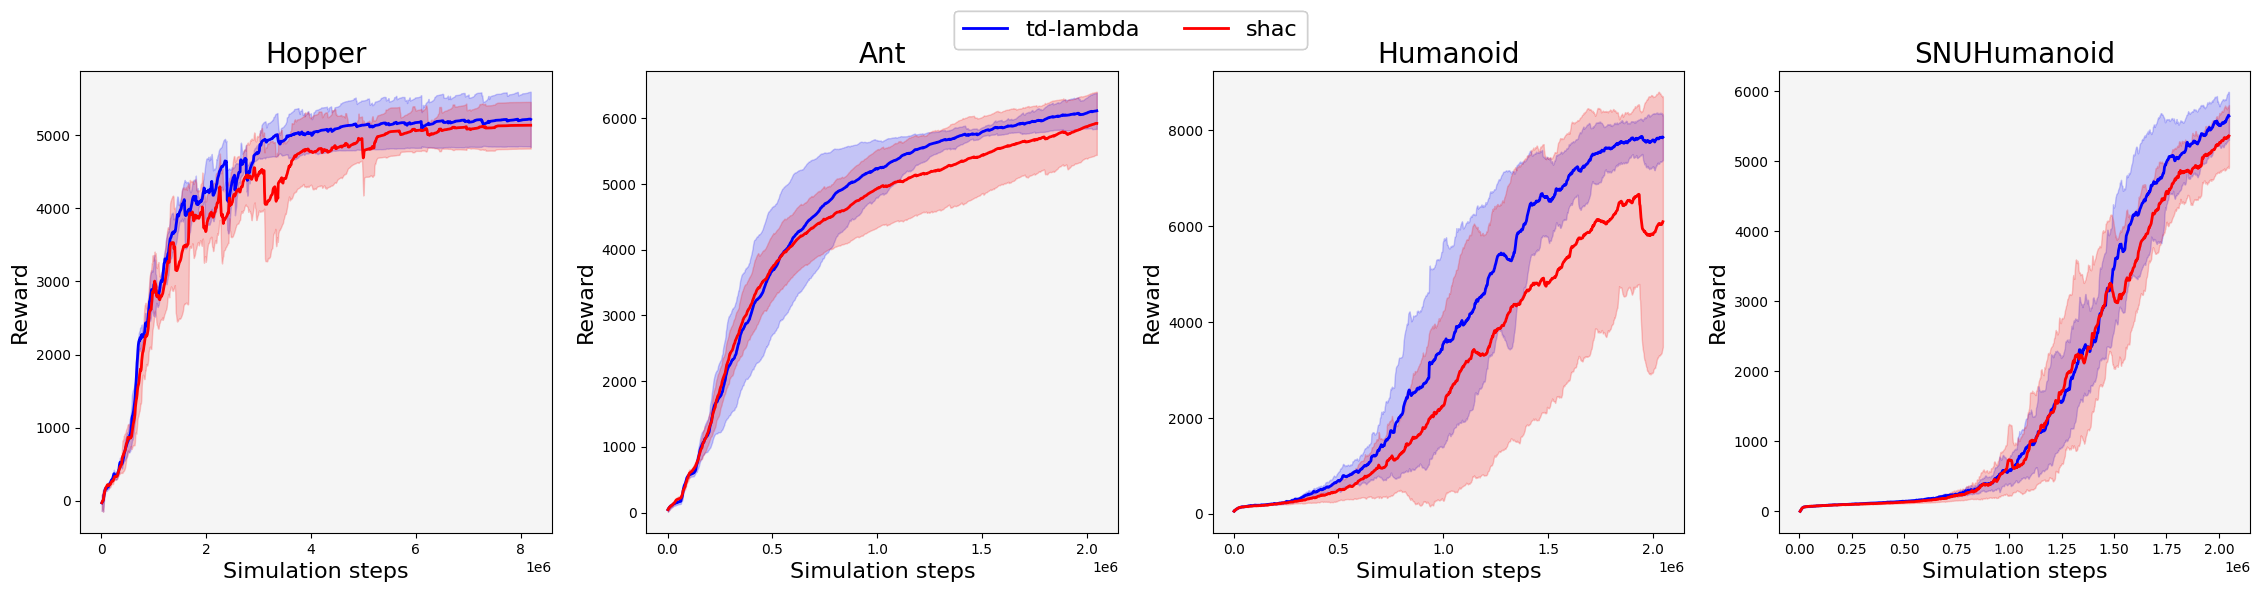

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('mplstyle.txt')

base_path = '/Users/timonkick/Documents/ETH/master/Sem3/FoRL/project'

envs = ['Hopper', 'Ant', 'Humanoid', 'SNUHumanoid']

font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 16}

fig, axs = plt.subplots(1, len(envs), figsize=(7 * len(envs), 6))

for i, env in enumerate(envs):
    # metadata
    axs[i].set_title(env)
    axs[i].set(xlabel='Simulation steps', ylabel='Reward')
    axs[i].set_facecolor('whitesmoke')
    
    # load data
    td_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'td', str(i) + '.txt'), delimiter=', ') for i in range(5)])
    shac_rews = np.array([np.genfromtxt(os.path.join(base_path, env, 'shac', str(i) + '.txt'), delimiter=', ') for i in range(5)])
    steps = np.genfromtxt(os.path.join(base_path, env, 'steps.txt'), delimiter=', ')  # same for both td and shac

    # mean and std
    td_mean = np.mean(td_rews, axis=0)
    td_std = np.std(td_rews, axis=0)
    shac_mean = np.mean(shac_rews, axis=0)
    shac_std = np.std(shac_rews, axis=0)

    # plot
    td_color, shac_color = 'blue', 'red'
    axs[i].plot(steps, td_mean, color=td_color, label='td-lambda')
    axs[i].fill_between(steps, td_mean + td_std, td_mean - td_std, color=td_color, alpha=0.2)
    axs[i].plot(steps, shac_mean, color=shac_color, label='shac')
    axs[i].fill_between(steps, shac_mean + shac_std, shac_mean - shac_std, color=shac_color, alpha=0.2)
    #axs[i].legend()

    handles, labels = axs[i].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center',
          fancybox=True, ncol=2)

plt.savefig('plot.png')
